In [94]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch import tensor 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

torch.set_warn_always(False)

In [95]:
num_samples = 1000 

X, y = make_circles(num_samples, noise = 0.01, random_state = 42)

In [96]:
print(X[(0, ), :].T.shape)

(2, 1)


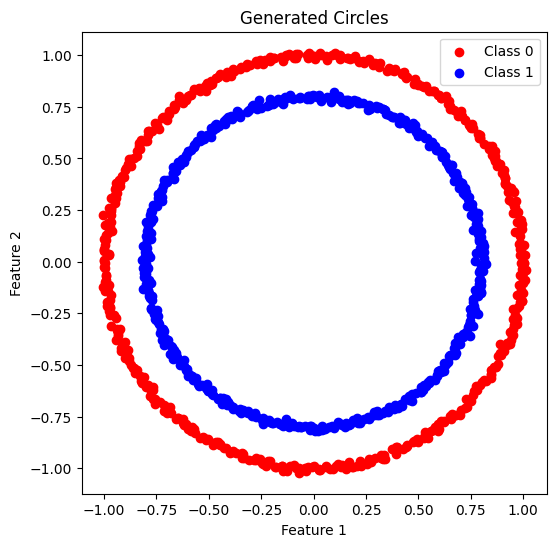

In [97]:
# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Add labels and title
plt.title('Generated Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Display the plot
plt.show()

### Gradient descent 

In [98]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

torch.manual_seed(0)
# layer 1 ==> 100 neurons
W1 = torch.randn(size = (100, 2), requires_grad= True)
b1 = torch.randn(size = (100, 1), requires_grad= True)
# layer 2 ==> 10 neurons  
W2 = torch.randn(size = (10, 100), requires_grad= True)
b2 = torch.randn(size = (10, 1), requires_grad= True)
# output layer with 1 neuron 
W3 = torch.randn(size = (1, 10), requires_grad= True)
b3 = torch.randn(size = (1, 1), requires_grad= True)

epochs, eta, loss = 1000, 0.1, []
for i in range(epochs) : 
    # forward prop 
    a1 = torch.matmul(W1, X[(i, ),:].T) + b1 # used (i, 1) to retain dim while accessing elements in X 
    h1 = torch.sigmoid(a1)
    a2 = torch.matmul(W2, h1) + b2 
    h2 = torch.sigmoid(a2)
    a3 = torch.matmul(W3, h2) + b3
    y_hat = torch.sigmoid(a3)

    # compute loss 
    L = torch.pow((y_hat-y[i]), 2)
    loss.append(L.detach().item())

    # back prop 
    L.backward()

    with torch.no_grad() : 
        W1 -= eta*W1.grad
        b1 -= eta*b1.grad
        W2 -= eta*W2.grad
        b2 -= eta*b2.grad
        W3 -= eta*W3.grad
        b3 -= eta*b3.grad

    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

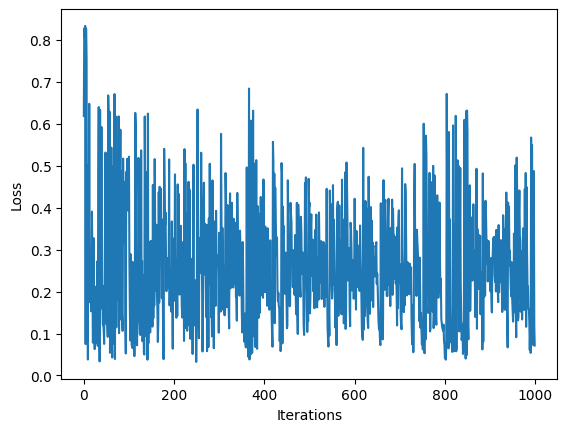

In [99]:
plt.plot(np.array(loss)) 
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### Batch Gradient Descent 

In [115]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

torch.manual_seed(0)
# layer 1 ==> 100 neurons
W1 = torch.randn(size = (100, 2), requires_grad= True)
b1 = torch.randn(size = (100, 1), requires_grad= True)
# layer 2 ==> 10 neurons  
W2 = torch.randn(size = (10, 100), requires_grad= True)
b2 = torch.randn(size = (10, 1), requires_grad= True)
# output layer with 1 neuron 
W3 = torch.randn(size = (1, 10), requires_grad= True)
b3 = torch.randn(size = (1, 1), requires_grad= True)

epochs, eta, batch_loss, batch_size = 1000, 0.1, [], 100
for _ in range(epochs) : 
    # forward prop 
    acc_loss = 0
    for i in range(batch_size) :
        a1 = torch.matmul(W1, X[(i, ),:].T) + b1 # used (i, 1) to retain dim while accessing elements in X 
        h1 = torch.sigmoid(a1)
        a2 = torch.matmul(W2, h1) + b2 
        h2 = torch.sigmoid(a2)
        a3 = torch.matmul(W3, h2) + b3
        y_hat = torch.sigmoid(a3)

        # compute loss 
        L = torch.pow((y_hat-y[i]), 2)
        acc_loss += L.detach().item()

        # back prop 
        L.backward()

    batch_loss.append(acc_loss)
    with torch.no_grad() : 
        W1 -= eta*W1.grad
        b1 -= eta*b1.grad
        W2 -= eta*W2.grad
        b2 -= eta*b2.grad
        W3 -= eta*W3.grad
        b3 -= eta*b3.grad

    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

C:\Users\ghora\AppData\Local\Temp\ipykernel_6612\3868469567.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
C:\Users\ghora\AppData\Local\Temp\ipykernel_6612\3868469567.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype = torch.float32)


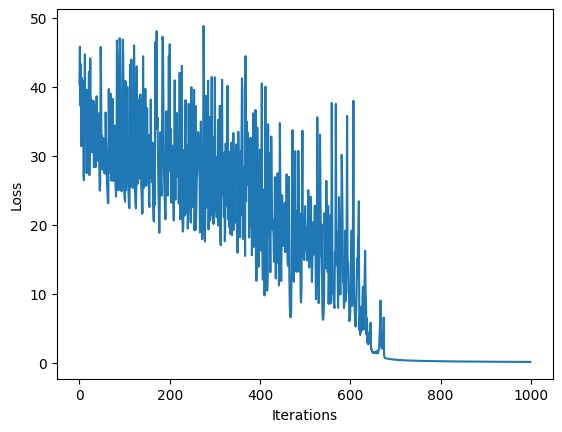

In [116]:
plt.plot(np.array(batch_loss)) 
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### Decision Boundary 

In [117]:
def infer(X) :
    with torch.no_grad() : 
        a1 = torch.matmul(W1, X.T) + b1
        h1 = torch.sigmoid(a1)
        a2 = torch.matmul(W2, h1) + b2 
        h2 = torch.sigmoid(a2)
        a3 = torch.matmul(W3, h2) + b3
        y_hat = torch.sigmoid(a3)
    return y_hat 

In [118]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x1, x2)
x_features = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

In [119]:
x_features[1].shape

torch.Size([2])

In [120]:
y_pred = np.zeros((10000, 1))
for i in range(x_features.shape[0]) : 
    y_pred[i] = infer(x_features[(i, ), :])

y_pred = y_pred > 0.5

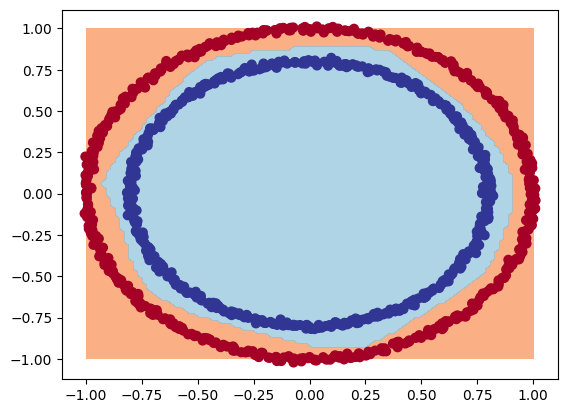

In [121]:
plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap = plt.cm.RdYlBu, alpha = 0.7)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu);